#Uvod u znanost o podacima (UZOP) - Projekt - Treci dio -  Early Predictor for Student Success Based on
Behavioural and Demographical Indicators

In [42]:
#!kaggle datasets download -d anlgrbz/student-demographics-online-education-dataoulad # Dataset
#!unzip student-demographics-online-education-dataoulad.zip -d ./student_data
#!pip install bartpy2 # Needed for BART model

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gc
plt.rcParams["figure.figsize"] = (6, 4)

The dataset consists of 7 tables: assessments.csv, courses.csv, studentAssessment.csv, studentInfo.csv, studentRegistration.csv, studentVle.csv and vle.csv.
Lets take a look at them one by one.

1. assessments.csv

In [44]:
assessments = pd.read_csv("assessments.csv") # Change path if needed ("student_data/assessments.csv" if on Collab + code in the 1st cell)
print(assessments.isna().sum())
print(assessments.describe())
print(f"Shape: {assessments.shape}")
assessments.head(8)

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000
Shape: (206, 6)


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0


This table is a list of all assessments throughout modules. Each module has multiple assessments and is repeated yearly.
Exams are the only type of assessment which doesn't have a date. Also date looks like to be a rising numerical value,
more specifically, number of days since module started (I suppose so). Weight is the percentage of total score of a module.

2. courses.csv

In [45]:
courses = pd.read_csv("courses.csv")
print(courses.isna().sum())
print(courses.describe())
print(f"Shape: {courses.shape}")
courses.head(8)

del(courses)

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000
Shape: (22, 3)


This table has a composite key, code_module and code_presentation, or in other words, module and its group and year of conduct.

3. student_info.csv

In [46]:
# studentInfo.csv

student_info = pd.read_csv("studentInfo.csv")
print(student_info.isna().sum())
print(student_info.describe())
print(f"Shape: {student_info.shape}")
student_info.head()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
         id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05              0.163225        79.758691
std    5.491673e+05              0.479758        41.071900
min    3.733000e+03              0.000000        30.000000
25%    5.085730e+05              0.000000        60.000000
50%    5.903100e+05              0.000000        60.000000
75%    6.444530e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000
Shape: (32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


This table is perhaps the "main" one. Why? Since the project itself is "Early Predictor for Student Success Based on Behavioural and Demographical Indicators", what we are actually trying to predict is the "final_result" variable.

It has a composite key of code_module, code_presentation and id_student. Rows represent students' attempts on different modules.

Let's visualize final_result distribution.

Text(0, 0.5, 'Number of attempts')

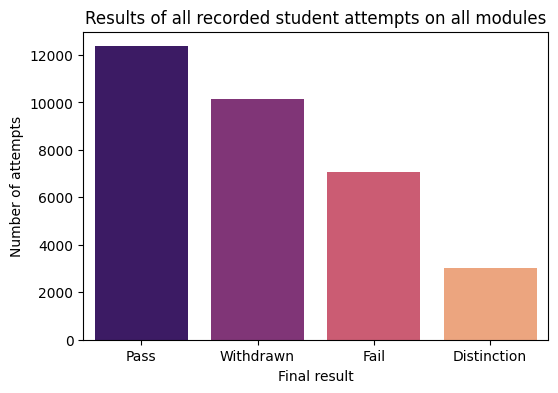

In [47]:
sns.countplot(x="final_result", data=student_info, palette="magma")
plt.title("Results of all recorded student attempts on all modules")
plt.xlabel("Final result")
plt.ylabel("Number of attempts")

4. studentAssessment.csv

In [48]:
# studentAssessment.csv

student_assessment = pd.read_csv("studentAssessment.csv")
print(student_assessment.isna().sum())
print(student_assessment.describe())
print(f"Shape: {student_assessment.shape}")
student_assessment.head()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000  
Shape: (173912, 5)


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


This table has a composite key too, id_assessment and id_student. It tracks all students' scores on all assessments. For and early "pre-enrollment" this data is not useful, however, we can make an early "post-enrollment" prediction by taking first recorded score for each student. We can do that by grouping the table by id_student and filtering rows with the minimum date_submitted, and then just extract the score.

In [49]:
# Identify the first assessment for each course/module
first_assessments = assessments.loc[assessments.groupby(['code_module', 'code_presentation'])['date'].idxmin()]
first_assessment_ids = first_assessments['id_assessment']

# Filter the studentAssessment data to include only scores for the first assessments
student_assessment_filtered = student_assessment[student_assessment['id_assessment'].isin(first_assessment_ids)]

# Select the first attempt for each student on those assessments
student_assessment_filtered = student_assessment_filtered.loc[
    student_assessment_filtered.groupby('id_student')['date_submitted'].idxmin()
]

# Keep only the relevant columns for merging
student_assessment_filtered = student_assessment_filtered[['id_student', 'score']]

# Output summary
print(student_assessment_filtered.nunique())
print(student_assessment_filtered.shape)
student_assessment_filtered.head()

del(first_assessments)
del(first_assessment_ids)
del(student_assessment)
del(assessments)


id_student    23046
score            97
dtype: int64
(23046, 2)


And now we have first score recorded for each student.

5. studentRegistration.csv

In [50]:
# studentRegistration.csv

student_registration = pd.read_csv("studentRegistration.csv")
print(student_registration.isna().sum())
print(student_registration.describe())
print(f"Shape: {student_registration.shape}")
student_registration.head()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64
         id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e+05         -29.000000           109.000000
max    2.716795e+06         167.000000           444.000000
Shape: (32593, 5)


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


6. studentVle.csv

In [51]:
# studentVle.csv

student_vle = pd.read_csv("studentVle.csv")
print(student_vle.isna().sum())
print(student_vle.describe())
print(f"Shape: {student_vle.shape}")
student_vle.head()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64
         id_student       id_site          date     sum_click
count  1.065528e+07  1.065528e+07  1.065528e+07  1.065528e+07
mean   7.333336e+05  7.383234e+05  9.517400e+01  3.716946e+00
std    5.827060e+05  1.312196e+05  7.607130e+01  8.849047e+00
min    6.516000e+03  5.267210e+05 -2.500000e+01  1.000000e+00
25%    5.077430e+05  6.735190e+05  2.500000e+01  1.000000e+00
50%    5.882360e+05  7.300690e+05  8.600000e+01  2.000000e+00
75%    6.464840e+05  8.770300e+05  1.560000e+02  3.000000e+00
max    2.698588e+06  1.049562e+06  2.690000e+02  6.977000e+03
Shape: (10655280, 6)


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


This table tracks students' interactions and activity within the Virtual Learning Environment (VLE). Specifically date of the interaction, site (resource) and total munber of interactions with that resource (sum_click). It has a composite key of code_module, code_presentation, id_student and id_site.

Date is relative to when the course starts (majority of resources are available all the time), so some rows have negative date values. We can use those rows for an early predictor.

In [52]:
student_vle_filtered = student_vle[student_vle["date"] < 0]
student_vle_filtered = student_vle_filtered.groupby('id_student')['sum_click'].sum().reset_index()
print(student_vle_filtered.nunique())
print(student_vle_filtered.shape)
student_vle_filtered.head()

del(student_vle)

id_student    21411
sum_click       872
dtype: int64
(21411, 2)


7. vle.csv

In [53]:
# vle.csv

vle = pd.read_csv("vle.csv")
print(vle.isna().sum())
print(vle.describe())
print(f"Shape: {vle.shape}")
vle.head()

del(vle)

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64
            id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.300965e+05    15.000000    15.000000
75%    8.140162e+05    22.000000    22.000000
max    1.077905e+06    29.000000    29.000000
Shape: (6364, 6)


This table has key id_site, and it represents information about the site, its module and presentation, activity_type, starting and ending dates. NaN probably indicates that resource remamins available throughout the entire duration of a given module. This table doesn't have any interesting data.

And that is all the data, majority of important features are in studentInfo.csv. From other tables we want date_registration (studentRegistration.csv), sum_click (extracted from studentVle.csv) and first assignment score (extracted from studentRegistration.csv). Lets start by merging all the data.

In [54]:
student_info = student_info.dropna() # Droping rows with missing values (some imd_band values missing)
student_info = student_info.drop("region", axis=1) # Droping region
student_registration = student_registration.drop("date_unregistration", axis=1) # Droping this column as it has mostly NaN values
                                                                                # (and probably not that important data)
student_registration = student_registration.dropna()

gc.collect()

22

In [55]:
reg_info = pd.merge(student_registration, student_info, on=["code_module", "code_presentation" , "id_student"]) # Merging by shared key
print(reg_info.shape)
reg_info.head()

del(student_info)
del(student_registration)

(31437, 12)


In [56]:

# Perform an outer join with reg_info as the left table
reg_info_2 = pd.merge(reg_info, student_vle_filtered, on="id_student", how='left')

# Replace NaN values in the sum of clicks column with 0
reg_info_2["sum_click"] = reg_info_2["sum_click"].fillna(0)

reg_info_2.head()

del(student_vle_filtered)
del(reg_info)

In [57]:
reg_info_3 = pd.merge(reg_info_2, student_assessment_filtered, on="id_student", how="left")

reg_info_3["score"] = reg_info_3["score"].fillna(0)

del(student_assessment_filtered)
del(reg_info_2)

In [58]:
# Convert ordinal features into binary (dichotomous) features
data = reg_info_3.copy()
del(reg_info_3)

'''
# Use pandas get_dummies to create binary columns for each category
education_dummies = pd.get_dummies(data['highest_education'], prefix='highest_education')
#imd_dummies = pd.get_dummies(data['imd_band'], prefix='imd_band')
age_dummies = pd.get_dummies(data['age_band'], prefix='age_band')
'''

data['age_band'] = data['age_band'].map({'0-35': 0, '35-55': 1, '55<=': 2})# Manual label encodingc

'''
data['imd_band'] = data['imd_band'].map({'0-10%': 0, '10-20': 1, '20-30%': 2, '30-40%': 3,
                                         '40-50%': 4, '50-60%': 5, '60-70%': 6,
                                         '70-80%': 7, '80-90%': 8, '90-100%': 9})
'''

education_mapping = {
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Post Graduate Qualification': 4
}

data['highest_education'] = data['highest_education'].map(education_mapping)


'''
# Combine the original data with the new binary columns
data = pd.concat([data, education_dummies, age_dummies], axis=1)
'''

data = data.drop(columns=['imd_band'])

gc.collect()


85

In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # Label encoding binary categorical features

data['gender'] = label_encoder.fit_transform(data['gender'])
data['disability'] = label_encoder.fit_transform(data['disability'])

data.head()


,code_module,code_presentation,id_student,date_registration,gender,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,AAA,2013J,11391,-159.0,1,3,2,0,240,0,Pass,98.0,78.0
1,AAA,2013J,28400,-53.0,0,3,1,0,60,0,Pass,215.0,70.0
2,AAA,2013J,30268,-92.0,0,2,1,0,60,1,Withdrawn,102.0,0.0
3,AAA,2013J,31604,-52.0,0,2,1,0,60,0,Pass,169.0,72.0
4,AAA,2013J,32885,-176.0,0,1,0,0,60,0,Pass,295.0,69.0


In [60]:
data = data.drop(columns=["id_student", "code_presentation", "code_module", "studied_credits"]) # Droping monotone and non-informative features (code_module could be but we are omitting it for now)
data.head()

,date_registration,gender,highest_education,age_band,num_of_prev_attempts,disability,final_result,sum_click,score
0,-159.0,1,3,2,0,0,Pass,98.0,78.0
1,-53.0,0,3,1,0,0,Pass,215.0,70.0
2,-92.0,0,2,1,0,1,Withdrawn,102.0,0.0
3,-52.0,0,2,1,0,0,Pass,169.0,72.0
4,-176.0,0,1,0,0,0,Pass,295.0,69.0


In [61]:
#data['final_result'] = data['final_result'].map({'Pass': 1, 'Fail': 0, 'Withdrawn': 2, 'Distinction': 3})
X = data.drop(columns=['final_result'])
y = data['final_result']

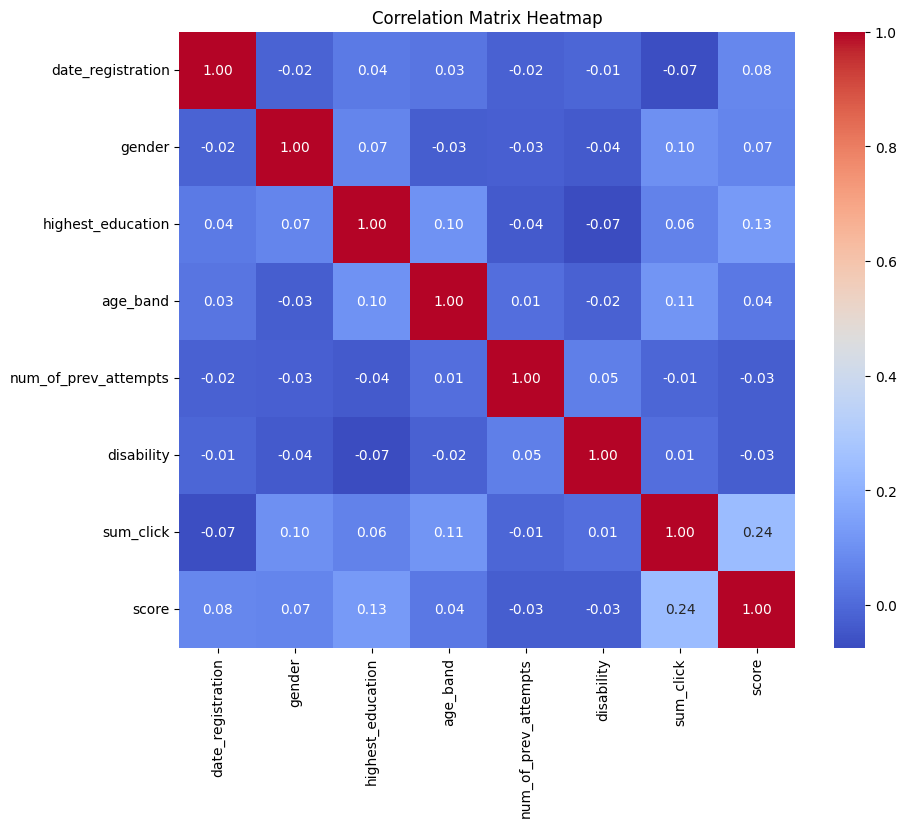

In [62]:
# Correlation matrix
cor_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

del(cor_matrix)
del(data)

In [63]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Make a seperate y, merge "Distinction" into "Pass" and "Withdrawn" into "Fail". 
# Define the original and merged class names.
original_classes = ["Distinction", "Fail", "Pass", "Withdrawn"]
merged_classes = {"Distinction": "Pass", "Withdrawn": "Fail"}

# Merge the classes in y
y_merged = y.replace(merged_classes)

del(y)

gc.collect()

9372

In [64]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

def doRandomForest(X_train, X_test, y_train, y_test):
    fig, ax = plt.subplots(2, figsize=(12, 8))

    class_names = ["Distinction", "Fail", "Pass", "Withdrawn"]
    
    rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_score = rf.predict_proba(X_test)

    # Evaluate the model
    print(f"Model Accuracy : {accuracy_score(y_test, y_pred_rf)}")
    print(f"\nClassification report:\n {classification_report(y_test, y_pred_rf)}")

    # Confusion matrix
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.sca(ax[0])
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Compute ROC curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Convert y_test to one-hot encoding for multi-class ROC
    y_test_bin = label_binarize(y_test, classes=class_names)

    # Compute ROC curve for each class
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve
    plt.sca(ax[1])
    colors = ['blue', 'red', 'green', 'orange']

    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for no skill
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    for target_class in ["Distinction", "Fail", "Pass", "Withdrawn"]:
        y_test_binary = (y_test == target_class).astype(int)
        y_pred_binary = (y_pred_rf == target_class).astype(int)

        precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
        recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
        f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
        accuracy = accuracy_score(y_test_binary, y_pred_binary)

        print(f"Performanse za klasu '{target_class}':")
        print(f"Preciznost: {precision:.2f}")
        print(f"Odziv: {recall:.2f}")
        print(f"F1-mjera: {f1:.2f}")
        print(f"Točnost: {accuracy:.2f}")
        print('------------' * 5)



Model Accuracy : 0.48377862595419846

Classification report:
               precision    recall  f1-score   support

 Distinction       0.27      0.15      0.19       820
        Fail       0.32      0.25      0.28      2093
        Pass       0.50      0.68      0.58      3571
   Withdrawn       0.59      0.51      0.55      2948

    accuracy                           0.48      9432
   macro avg       0.42      0.40      0.40      9432
weighted avg       0.47      0.48      0.47      9432



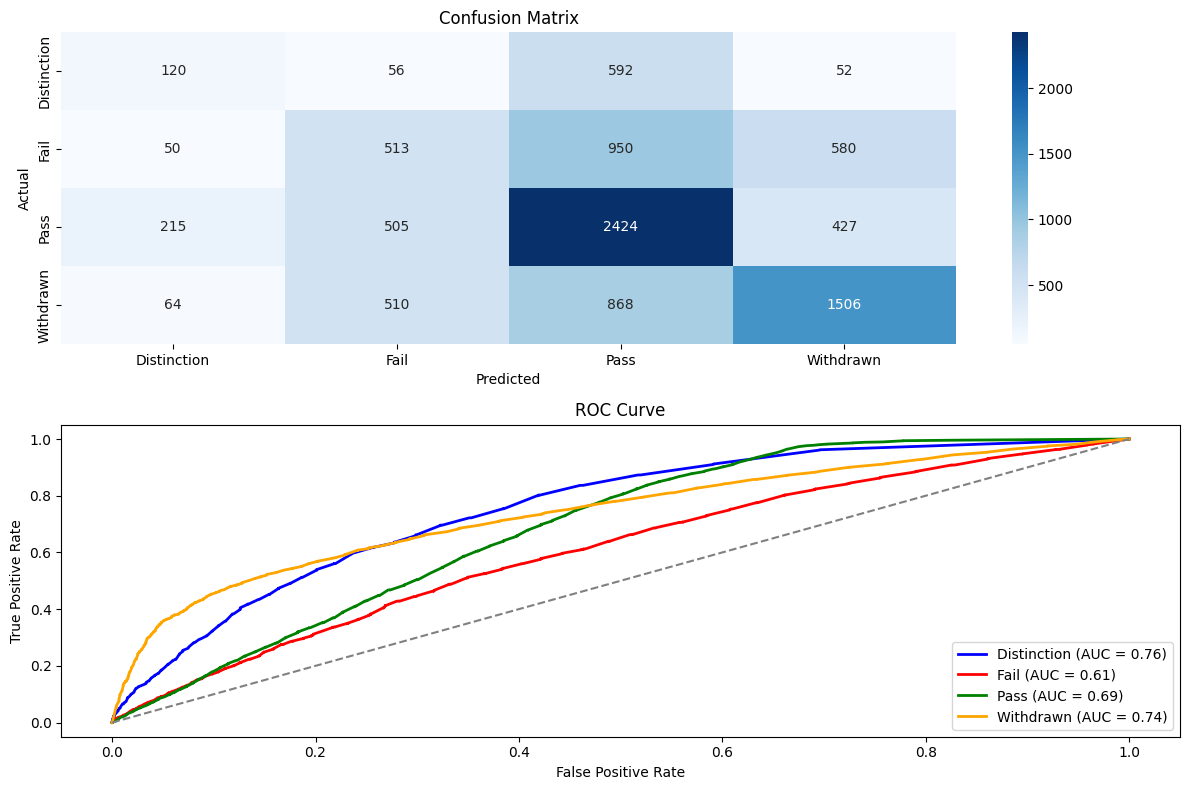

Performanse za klasu 'Distinction':
Preciznost: 0.87
Odziv: 0.89
F1-mjera: 0.88
Točnost: 0.89
------------------------------------------------------------
Performanse za klasu 'Fail':
Preciznost: 0.69
Odziv: 0.72
F1-mjera: 0.70
Točnost: 0.72
------------------------------------------------------------
Performanse za klasu 'Pass':
Preciznost: 0.66
Odziv: 0.62
F1-mjera: 0.63
Točnost: 0.62
------------------------------------------------------------
Performanse za klasu 'Withdrawn':
Preciznost: 0.73
Odziv: 0.73
F1-mjera: 0.73
Točnost: 0.73
------------------------------------------------------------


9368

In [65]:
doRandomForest(X_train, X_test, y_train, y_test)
gc.collect()

In [66]:
from sklearn.tree import DecisionTreeClassifier

def doDecisionTree(X_train, X_test, y_train, y_test):
    fig, ax = plt.subplots(2, figsize=(12, 8))

    class_names = ["Distinction", "Fail", "Pass", "Withdrawn"]

    dt = DecisionTreeClassifier(class_weight='balanced').fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    y_score = dt.predict_proba(X_test)

    print(f"Model Accuracy : {accuracy_score(y_test, y_pred_dt)}")
    print(f"\nClassification report:\n {classification_report(y_test, y_pred_dt)}")

    cm_dt = confusion_matrix(y_test, y_pred_dt)
    plt.sca(ax[0])
    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    fpr = {}
    tpr = {}
    roc_auc = {}

    y_test_bin = label_binarize(y_test, classes=class_names)

    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.sca(ax[1])
    colors = ['blue', 'red', 'green', 'orange']

    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    for target_class in ["Distinction", "Fail", "Pass", "Withdrawn"]:
        y_test_binary = (y_test == target_class).astype(int)
        y_pred_binary = (y_pred_dt == target_class).astype(int)

        precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
        recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
        f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
        accuracy = accuracy_score(y_test_binary, y_pred_binary)

        print(f"Performanse za klasu '{target_class}':")
        print(f"Preciznost: {precision:.2f}")
        print(f"Odziv: {recall:.2f}")
        print(f"F1-mjera: {f1:.2f}")
        print(f"Točnost: {accuracy:.2f}")
        print('------------' * 5)

Model Accuracy : 0.426420695504665

Classification report:
               precision    recall  f1-score   support

 Distinction       0.19      0.21      0.20       820
        Fail       0.30      0.30      0.30      2093
        Pass       0.50      0.49      0.49      3571
   Withdrawn       0.50      0.50      0.50      2948

    accuracy                           0.43      9432
   macro avg       0.37      0.37      0.37      9432
weighted avg       0.43      0.43      0.43      9432



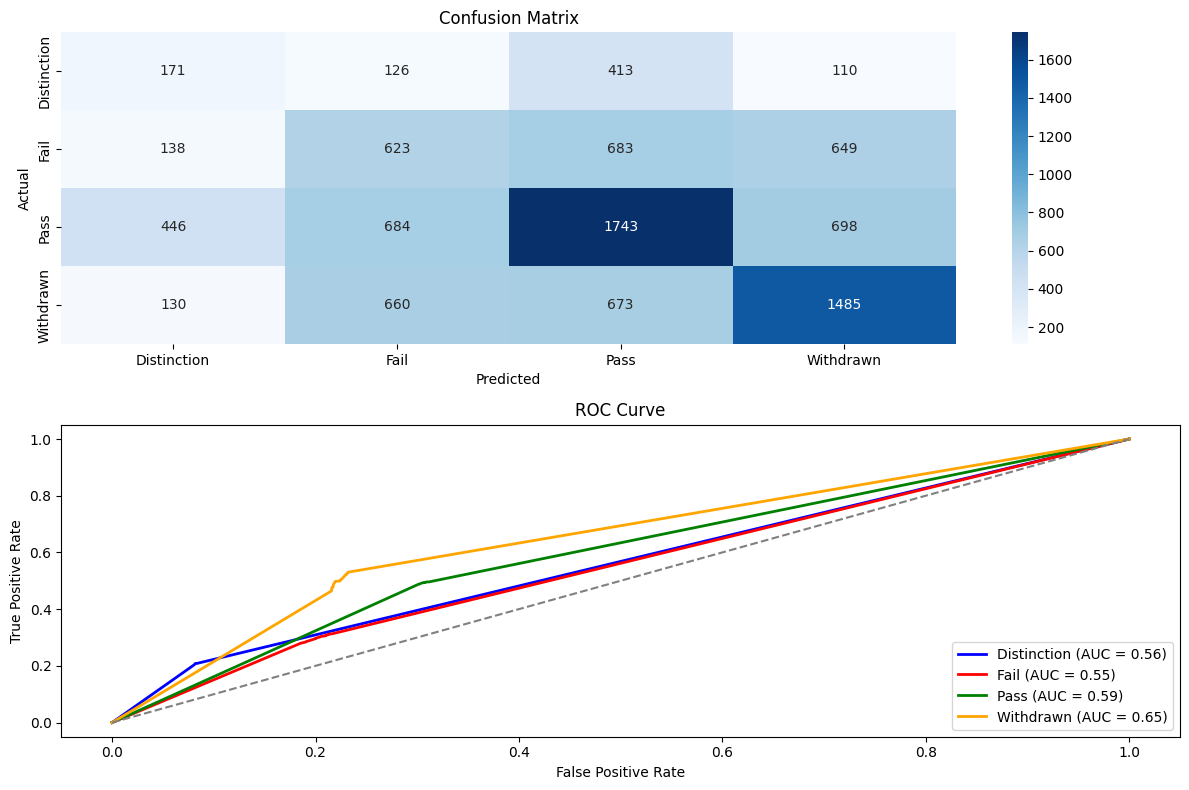

Performanse za klasu 'Distinction':
Preciznost: 0.86
Odziv: 0.86
F1-mjera: 0.86
Točnost: 0.86
------------------------------------------------------------
Performanse za klasu 'Fail':
Preciznost: 0.69
Odziv: 0.69
F1-mjera: 0.69
Točnost: 0.69
------------------------------------------------------------
Performanse za klasu 'Pass':
Preciznost: 0.62
Odziv: 0.62
F1-mjera: 0.62
Točnost: 0.62
------------------------------------------------------------
Performanse za klasu 'Withdrawn':
Preciznost: 0.69
Odziv: 0.69
F1-mjera: 0.69
Točnost: 0.69
------------------------------------------------------------


9671

In [67]:
doDecisionTree(X_train, X_test, y_train, y_test)
gc.collect()

In [68]:
from bartpy2.sklearnmodel import SklearnModel
from sklearn.preprocessing import LabelEncoder

def doBART(X_train, X_test, y_train, y_test):
    fig, ax = plt.subplots(2, figsize=(12, 8))

    class_names = ["Distinction", "Fail", "Pass", "Withdrawn"]

    # Encode class labels
    label_encoder = LabelEncoder()
    label_encoder.fit(class_names)
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Prepare variables for One-vs-Rest training
    y_train_bin = label_binarize(y_train_encoded, classes=np.arange(len(class_names)))
    y_test_bin = label_binarize(y_test_encoded, classes=np.arange(len(class_names)))

    # One-vs-Rest: Train a BART model for each class
    y_pred_probs = np.zeros((X_test.shape[0], len(class_names)))

    for i, class_name in enumerate(class_names):
        print(f"Training BART model for class '{class_name}' vs. Rest...")
        bart = SklearnModel(n_jobs=1)
        bart.fit(X_train, y_train_bin[:, i])
        y_pred_probs[:, i] = bart.predict(X_test)

    # Assign final predicted classes
    y_pred = y_pred_probs.argmax(axis=1)

    # Evaluate the model
    print(f"Model Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
    print(f"\nClassification Report:\n{classification_report(y_test_encoded, y_pred, target_names=class_names)}")

    # Confusion matrix
    cm_bart = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm_bart, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax[0])
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = {}, {}, {}
    for i, class_name in enumerate(class_names):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    colors = ['blue', 'red', 'green', 'orange']
    for i, color in enumerate(colors):
        ax[1].plot(fpr[i], tpr[i], color=color, lw=2,
                   label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[1].set_title("ROC Curve")
    ax[1].set_xlabel("False Positive Rate")
    ax[1].set_ylabel("True Positive Rate")
    ax[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    for target_class in ["Distinction", "Fail", "Pass", "Withdrawn"]:
        y_test_binary = (y_test_decoded == target_class).astype(int)
        y_pred_binary = (y_pred_decoded == target_class).astype(int)

        precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
        recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
        f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
        accuracy = accuracy_score(y_test_binary, y_pred_binary)

        print(f"Performanse za klasu '{target_class}':")
        print(f"Preciznost: {precision:.2f}")
        print(f"Odziv: {recall:.2f}")
        print(f"F1-mjera: {f1:.2f}")
        print(f"Točnost: {accuracy:.2f}")
        print('------------' * 5)



Training BART model for class 'Distinction' vs. Rest...
Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.11it/s]


Starting sampling


100%|██████████| 200/200 [00:31<00:00,  6.29it/s]


Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.23it/s]


Starting sampling


100%|██████████| 200/200 [00:32<00:00,  6.09it/s]


Starting burn


100%|██████████| 200/200 [00:34<00:00,  5.88it/s]


Starting sampling


100%|██████████| 200/200 [00:34<00:00,  5.84it/s]


Starting burn


100%|██████████| 200/200 [00:34<00:00,  5.84it/s]


Starting sampling


100%|██████████| 200/200 [00:35<00:00,  5.62it/s]


Training BART model for class 'Fail' vs. Rest...
Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.22it/s]


Starting sampling


100%|██████████| 200/200 [00:31<00:00,  6.40it/s]


Starting burn


100%|██████████| 200/200 [00:31<00:00,  6.25it/s]


Starting sampling


100%|██████████| 200/200 [00:32<00:00,  6.20it/s]


Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.13it/s]


Starting sampling


100%|██████████| 200/200 [00:33<00:00,  5.91it/s]


Starting burn


100%|██████████| 200/200 [00:34<00:00,  5.80it/s]


Starting sampling


100%|██████████| 200/200 [00:35<00:00,  5.69it/s]


Training BART model for class 'Pass' vs. Rest...
Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.12it/s]


Starting sampling


100%|██████████| 200/200 [00:31<00:00,  6.41it/s]


Starting burn


100%|██████████| 200/200 [00:31<00:00,  6.45it/s]


Starting sampling


100%|██████████| 200/200 [00:32<00:00,  6.15it/s]


Starting burn


100%|██████████| 200/200 [00:33<00:00,  5.97it/s]


Starting sampling


100%|██████████| 200/200 [00:33<00:00,  5.93it/s]


Starting burn


100%|██████████| 200/200 [00:34<00:00,  5.82it/s]


Starting sampling


100%|██████████| 200/200 [00:35<00:00,  5.66it/s]


Training BART model for class 'Withdrawn' vs. Rest...
Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.14it/s]


Starting sampling


100%|██████████| 200/200 [00:32<00:00,  6.12it/s]


Starting burn


100%|██████████| 200/200 [00:31<00:00,  6.34it/s]


Starting sampling


100%|██████████| 200/200 [00:33<00:00,  6.02it/s]


Starting burn


100%|██████████| 200/200 [00:33<00:00,  6.05it/s]


Starting sampling


100%|██████████| 200/200 [00:36<00:00,  5.54it/s]


Starting burn


100%|██████████| 200/200 [00:34<00:00,  5.77it/s]


Starting sampling


100%|██████████| 200/200 [00:35<00:00,  5.65it/s]


Model Accuracy: 0.5368956743002544

Classification Report:
              precision    recall  f1-score   support

 Distinction       0.33      0.01      0.01       820
        Fail       0.42      0.13      0.19      2093
        Pass       0.49      0.91      0.64      3571
   Withdrawn       0.70      0.53      0.60      2948

    accuracy                           0.54      9432
   macro avg       0.49      0.39      0.36      9432
weighted avg       0.53      0.54      0.47      9432



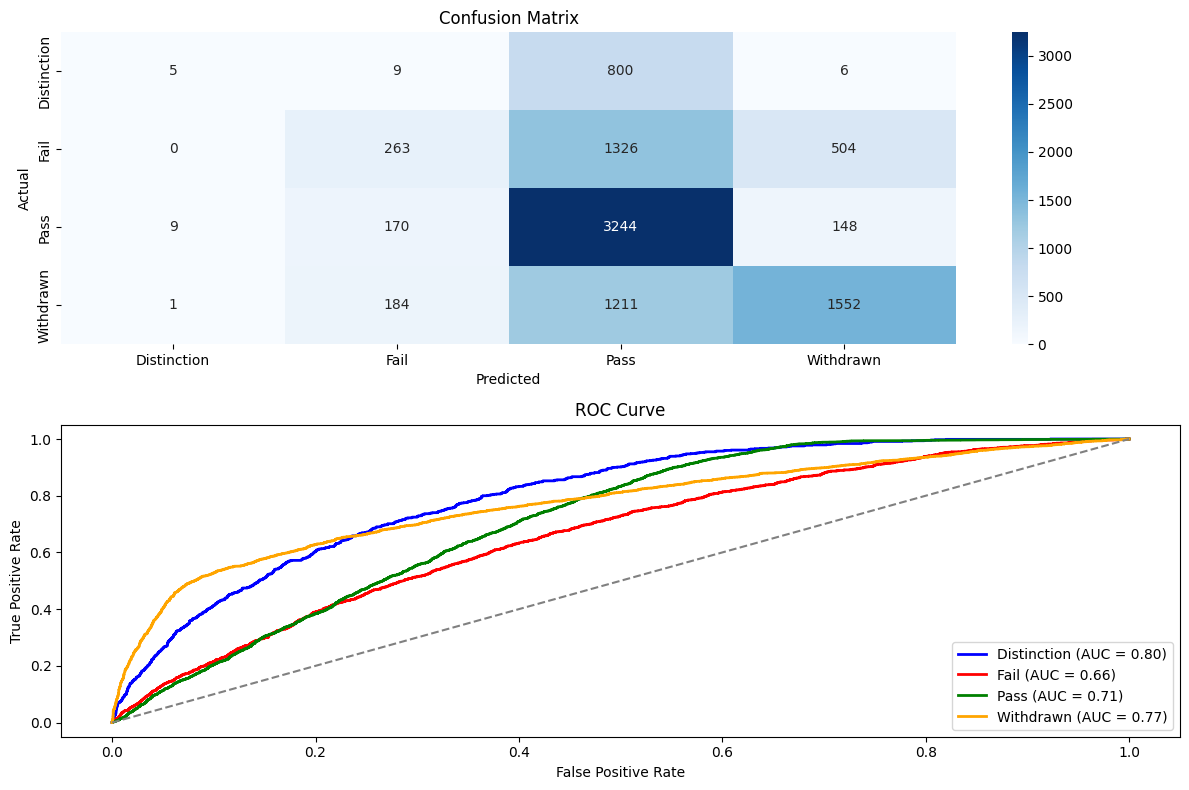

Performanse za klasu 'Distinction':
Preciznost: 0.86
Odziv: 0.91
F1-mjera: 0.87
Točnost: 0.91
------------------------------------------------------------
Performanse za klasu 'Fail':
Preciznost: 0.71
Odziv: 0.77
F1-mjera: 0.72
Točnost: 0.77
------------------------------------------------------------
Performanse za klasu 'Pass':
Preciznost: 0.74
Odziv: 0.61
F1-mjera: 0.60
Točnost: 0.61
------------------------------------------------------------
Performanse za klasu 'Withdrawn':
Preciznost: 0.77
Odziv: 0.78
F1-mjera: 0.77
Točnost: 0.78
------------------------------------------------------------


9555

In [69]:
doBART(X_train, X_test, y_train, y_test)
gc.collect()

If we limit our labels to only "Fail" and "Pass", by merging "Distinction" -> "Pass" and "Withdrawn" -> "Fail". We can get much better results, especially with this model, and we can avoid expensive OVR. 

In [70]:

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y_merged, test_size=0.3)

del(X)
#del(X_train)
#del(X_test)
#del(y_test)
#del(y_train) # NOTE Ivane ove del-ove zakomentiraj (osim X) da ostanu train i test sa svim oznakama, za XGBoost (ili nemoj ako ces binarno)

In [71]:
def doBART_binary(X_train, X_test, y_train, y_test):
    fig, ax = plt.subplots(2, figsize=(12, 8))

    class_names = ["Fail", "Pass"]

    # Encode class labels
    label_encoder = LabelEncoder()
    label_encoder.fit(class_names)
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Train a single BART model for binary classification
    bart = SklearnModel(n_jobs=1)
    bart.fit(X_train, y_train_encoded)

    # Predict probabilities and classes
    y_pred_probs = bart.predict(X_test)
    y_pred = np.round(y_pred_probs).astype(int)

    # Evaluate the model
    print(f"Model Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
    print(f"\nClassification Report:\n{classification_report(y_test_encoded, y_pred, target_names=class_names)}")

    # Confusion matrix
    cm_bart = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm_bart, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax[0])
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    ax[1].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[1].set_title("ROC Curve")
    ax[1].set_xlabel("False Positive Rate")
    ax[1].set_ylabel("True Positive Rate")
    ax[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    for target_class in ["Fail", "Pass"]:
        y_test_binary = (y_test_decoded == target_class).astype(int)
        y_pred_binary = (y_pred_decoded == target_class).astype(int)

        precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
        recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
        f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
        accuracy = accuracy_score(y_test_binary, y_pred_binary)

        print(f"Performanse za klasu '{target_class}':")
        print(f"Preciznost: {precision:.2f}")
        print(f"Odziv: {recall:.2f}")
        print(f"F1-mjera: {f1:.2f}")
        print(f"Točnost: {accuracy:.2f}")
        print('------------' * 5)

Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.11it/s]


Starting sampling


100%|██████████| 200/200 [00:31<00:00,  6.29it/s]


Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.10it/s]


Starting sampling


100%|██████████| 200/200 [00:32<00:00,  6.07it/s]


Starting burn


100%|██████████| 200/200 [00:32<00:00,  6.11it/s]


Starting sampling


100%|██████████| 200/200 [00:36<00:00,  5.55it/s]


Starting burn


100%|██████████| 200/200 [00:35<00:00,  5.62it/s]


Starting sampling


100%|██████████| 200/200 [00:35<00:00,  5.70it/s]


Model Accuracy: 0.7223282442748091

Classification Report:
              precision    recall  f1-score   support

        Fail       0.78      0.65      0.71      4944
        Pass       0.67      0.80      0.73      4488

    accuracy                           0.72      9432
   macro avg       0.73      0.73      0.72      9432
weighted avg       0.73      0.72      0.72      9432



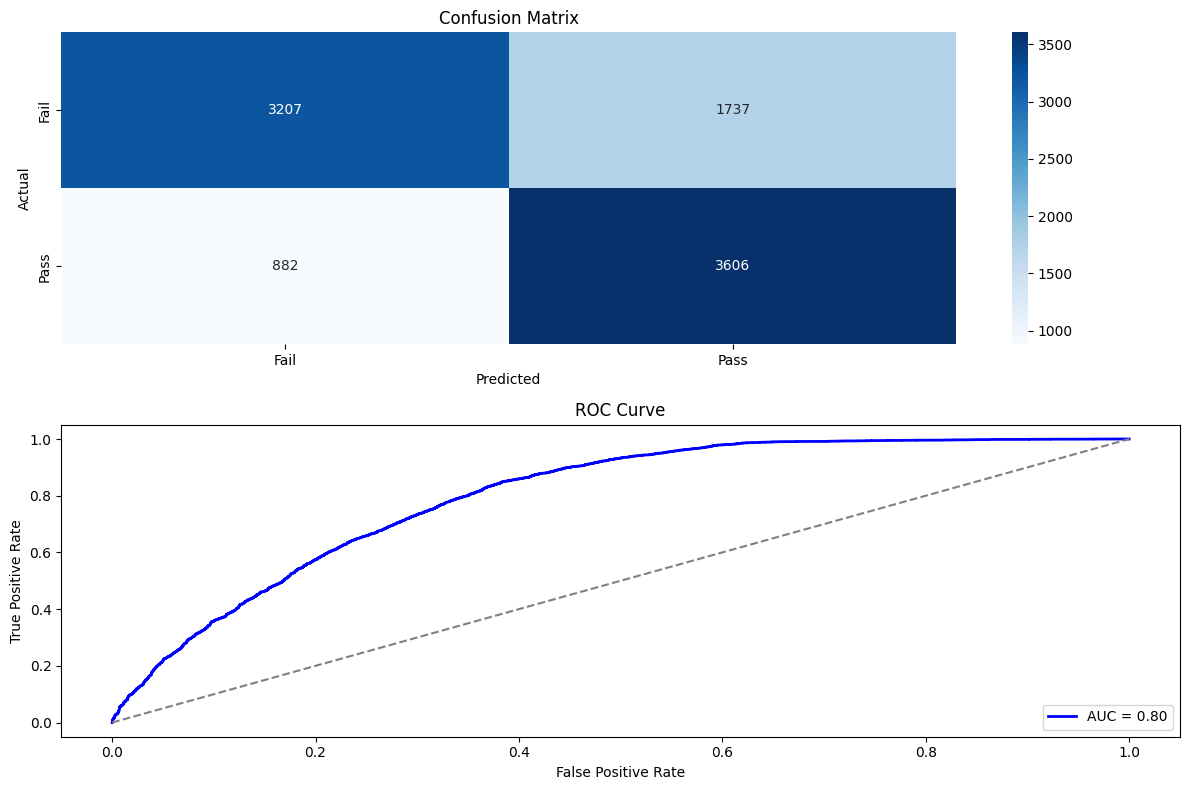

Performanse za klasu 'Fail':
Preciznost: 0.73
Odziv: 0.72
F1-mjera: 0.72
Točnost: 0.72
------------------------------------------------------------
Performanse za klasu 'Pass':
Preciznost: 0.73
Odziv: 0.72
F1-mjera: 0.72
Točnost: 0.72
------------------------------------------------------------


8025

In [72]:
doBART_binary(X_train_, X_test_, y_train_, y_test_)
gc.collect()

In [77]:
from xgboost import XGBClassifier

def doXGBoost(X_train, X_test, y_train, y_test):
    fig, ax = plt.subplots(2, figsize=(8, 6))

    class_names = ["Distinction", "Fail", "Pass", "Withdrawn"]

    # Encode target labels as integers
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb.fit(X_train, y_train_encoded)

    y_pred_xgb = xgb.predict(X_test)
    y_score = xgb.predict_proba(X_test)

    # Print accuracy and classification report
    print(f"Model Accuracy : {accuracy_score(y_test_encoded, y_pred_xgb)}")
    print(f"\nClassification report:\n {classification_report(y_test_encoded, y_pred_xgb)}")

    # Confusion matrix
    cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
    plt.sca(ax[0])
    sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Compute ROC curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Convert y_test_encoded to one-hot encoding for multi-class ROC
    y_test_bin = label_binarize(y_test_encoded, classes=range(len(class_names)))

    # Compute ROC curve for each class
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve
    plt.sca(ax[1])
    colors = ['blue', 'red', 'green', 'orange']

    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for no skill
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)

    for target_class in ["Distinction", "Fail", "Pass", "Withdrawn"]:
        y_test_binary = (y_test_decoded == target_class).astype(int)
        y_pred_binary = (y_pred_decoded == target_class).astype(int)

        precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
        recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
        f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
        accuracy = accuracy_score(y_test_binary, y_pred_binary)

        print(f"Performanse za klasu '{target_class}':")
        print(f"Preciznost: {precision:.2f}")
        print(f"Odziv: {recall:.2f}")
        print(f"F1-mjera: {f1:.2f}")
        print(f"Točnost: {accuracy:.2f}")
        print('------------' * 5)


Model Accuracy : 0.5328668363019508

Classification report:
               precision    recall  f1-score   support

           0       0.41      0.11      0.18       820
           1       0.39      0.19      0.26      2093
           2       0.51      0.82      0.63      3571
           3       0.67      0.54      0.60      2948

    accuracy                           0.53      9432
   macro avg       0.49      0.42      0.41      9432
weighted avg       0.52      0.53      0.50      9432



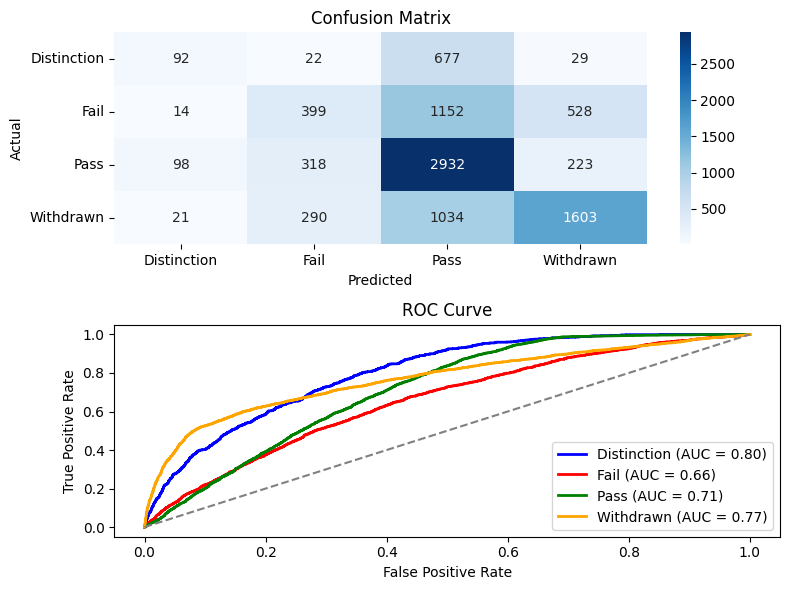

Performanse za klasu 'Distinction':
Preciznost: 0.88
Odziv: 0.91
F1-mjera: 0.88
Točnost: 0.91
------------------------------------------------------------
Performanse za klasu 'Fail':
Preciznost: 0.71
Odziv: 0.75
F1-mjera: 0.72
Točnost: 0.75
------------------------------------------------------------
Performanse za klasu 'Pass':
Preciznost: 0.70
Odziv: 0.63
F1-mjera: 0.63
Točnost: 0.63
------------------------------------------------------------
Performanse za klasu 'Withdrawn':
Preciznost: 0.77
Odziv: 0.77
F1-mjera: 0.77
Točnost: 0.77
------------------------------------------------------------


25324

In [78]:
doXGBoost(X_train, X_test, y_train, y_test)
gc.collect()